<a href="https://colab.research.google.com/github/W-mauyon/PROPEL-JHU-EEHPC-Research/blob/main/MNIST_basic_Python_fully_connected_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Importing libaries and loading MNIST datasets

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random


# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print the shape of the training data
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)




* **Preprocessing the data:**
1. First, normalize pixel values from 0 to 255 to 0 to 1 as neural networks works when inputs are small and similar in scale.
2. Flatten the images (each image from 28×28 (2D) to 784 (1D).)
3. Encode Integer labels to vectors



In [13]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [14]:
'''
fig, ax = plt.subplots(6, 6)
k = 0
for i in range(6):
    for j in range(6):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()
'''

"\nfig, ax = plt.subplots(6, 6)\nk = 0\nfor i in range(6):\n    for j in range(6):\n        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')\n        k += 1\nplt.show()\n"

In [15]:
def one_hot_encode(y, num_classes = 10):
  return np.eye(num_classes)[y]

y_test_encoded = one_hot_encode(y_test)
y_train_encoded = one_hot_encode(y_train)

print(y_train_encoded.shape)
print(x_train.shape)

(60000, 10)
(60000, 784)


In [16]:
np.random.seed(42)

input_size = 784
output_size = 10

weights = np.random.randn(input_size, output_size) * 0.01
biases = np.zeros((1, output_size))


* Forward Pass with Softmax

In [17]:
def softmax(z):
  exp_scores = np.exp(z - np.max(z, axis = 1, keepdims=True))
  return exp_scores/np.sum(exp_scores, axis = 1, keepdims=True)

def forwardpass(x_train, weights, biases):
  z = np.dot(x_train, weights) + biases
  return softmax(z)




* Cross-entropy Loss Function


In [18]:
def cross_entropy_loss(predictions, labels):
  m = labels.shape[0]
  log_probs = -np.log(predictions + 1e-9)
  loss = np.sum(labels * log_probs)/m
  return loss



* Backward Pass and Update



In [19]:
def backward_pass(x_train, predictions, labels, learning_rate = 0.1):
  m = x_train.shape[0]
  dz = predictions - labels
  dw = (1/m) * np.dot(x_train.T, dz)
  db = (1/m) * np.sum(dz, axis = 0, keepdims=True)

  global weights, biases
  weights -= learning_rate * dw
  biases -= learning_rate * db



* Training model



Epoch: 1/40, Loss: 2.3276569720778606
Epoch: 2/40, Loss: 2.2207976588716067
Epoch: 3/40, Loss: 2.123421999699058
Epoch: 4/40, Loss: 2.033500262521834
Epoch: 5/40, Loss: 1.9501100358657897
Epoch: 6/40, Loss: 1.8727123902343112
Epoch: 7/40, Loss: 1.8008920320563642
Epoch: 8/40, Loss: 1.7342708647300775
Epoch: 9/40, Loss: 1.672484185917154
Epoch: 10/40, Loss: 1.6151773780875678
Epoch: 11/40, Loss: 1.5620081946584772
Epoch: 12/40, Loss: 1.5126498298535902
Epoch: 13/40, Loss: 1.4667934061288437
Epoch: 14/40, Loss: 1.4241496047836761
Epoch: 15/40, Loss: 1.384449487258137
Epoch: 16/40, Loss: 1.3474446407387326
Epoch: 17/40, Loss: 1.312906796989651
Epoch: 18/40, Loss: 1.2806270652203535
Epoch: 19/40, Loss: 1.2504149023608007
Epoch: 20/40, Loss: 1.2220969229327243
Epoch: 21/40, Loss: 1.1955156290473763
Epoch: 22/40, Loss: 1.1705281210277565
Epoch: 23/40, Loss: 1.147004831903036
Epoch: 24/40, Loss: 1.1248283149661806
Epoch: 25/40, Loss: 1.1038921026364414
Epoch: 26/40, Loss: 1.0840996466665667
E

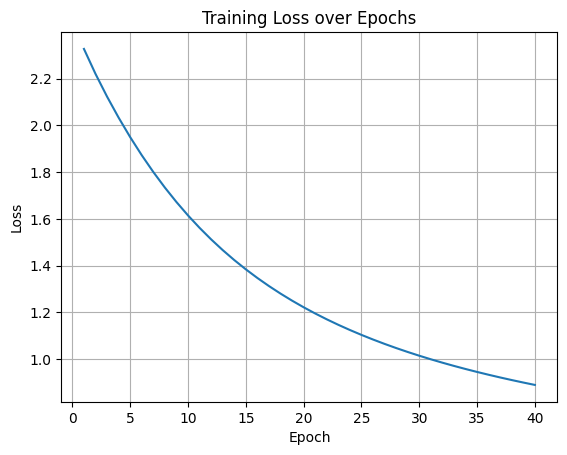

In [20]:
losses = []
epochs = 40
for epoch in range(epochs):
  predictions = forwardpass(x_train, weights, biases)
  loss = cross_entropy_loss(predictions, y_train_encoded)
  backward_pass(x_train, predictions, y_train_encoded)

  losses.append(loss)
  print(f"Epoch: {epoch +1}/{epochs}, Loss: {loss}")

# Plot loss
plt.plot(range(1, epochs+1), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()



* Evaluating Model's Accuracy



In [21]:
def evaluate(x_test, y_test_encoded):
  predictions = forwardpass(x_test, weights, biases)
  predicted_labels = np.argmax(predictions, axis =1)
  true_labels = np.argmax(y_test_encoded, axis = 1)

  accuracy = np.mean(predicted_labels == true_labels)
  correct = np.sum(predicted_labels == true_labels)
  incorrect = len(true_labels) - correct

  print(f"Correct predictions: {correct}")
  print(f"Incorrect predictions: {incorrect}")
  print(f"Test Accuracy : {round(accuracy * 100, 2)} %")
  return predicted_labels, true_labels

predicted_labels, true_labels = evaluate(x_test, y_test_encoded)

Correct predictions: 8426
Incorrect predictions: 1574
Test Accuracy : 84.26 %


In [22]:
def visualize_predictions(x_test, predicted_labels, true_labels):
    plt.figure(figsize=(12, 6))
    for i in range(10):
        index = random.randint(0, len(x_test) - 1)
        image = x_test[index].reshape(28, 28)

        plt.subplot(2, 5, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Pred: {predicted_labels[index]}, True: {true_labels[index]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

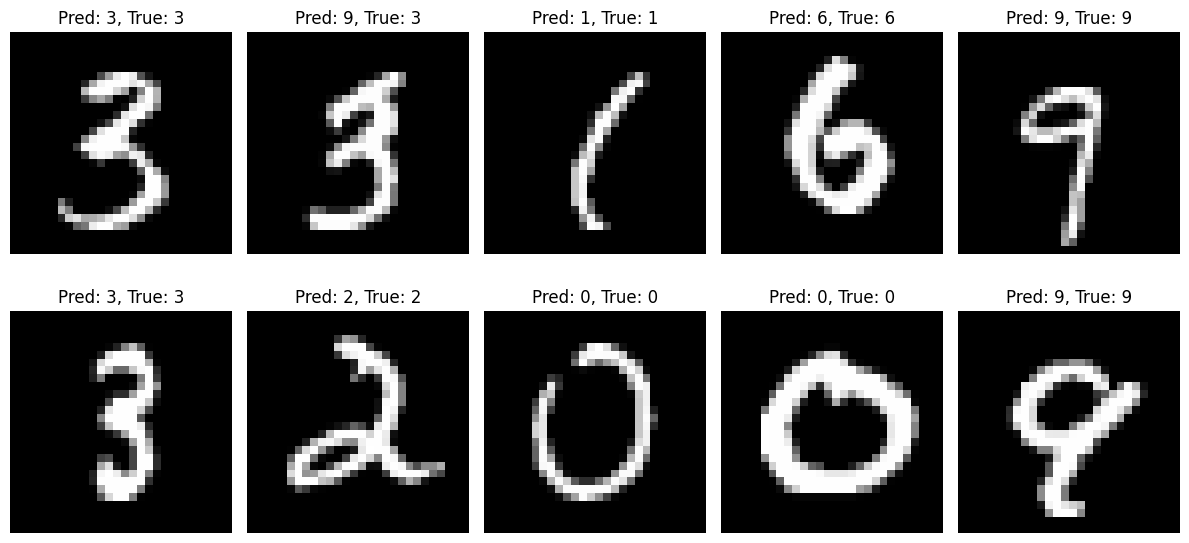

In [23]:
visualize_predictions(x_test, predicted_labels, true_labels)